In [1]:
from __future__ import print_function, division

import thinkdsp
import thinkplot
import numpy as np

from IPython.display import display

%matplotlib inline

# Signal objects

Signal is a parent class that provides functions common to all kinds of signals, like make_wave. Child classes inherit these methods and provide evaluate, which evaluates the signal at a given sequence of times.

### Parameters
freq: frequency in cycles per second, or Hz. 

amp: amplitude. The units of amplitude are arbitrary, usually chosen so 1.0 corresponds to the maximum input from a microphone or max- imum output to a speaker.

offset: indicates where in its period the signal starts;

func: a Python function used to evaluate the signal at a particular point in time. It is usually either np.sin or np.cos, yielding a sine or cosine signal.

Signal objects that represent periodic signals have a `period` attribute.


# Wave objects

A Signal represents a mathematical function defined for all values of time.  If you evaluate a signal at a sequence of equally-spaced times, the result is a Wave.  

### Parameters

`framerate` is the number of samples per second.

`ys` is a NumPy array that contains the values from the signal.

`ts` is a NumPy array that contains the times where the signal was evaluated or sampled.

`read_wave` reads WAV files.

In [5]:
wave = thinkdsp.read_wave()
wave.make_audio()

In [6]:
print('Frame rate:', wave.framerate)
print('Number of samples:', len(wave.ys))
print('Timestep in ms:', 1 / wave.framerate * 1000)

Frame rate: 44100
Number of samples: 1177856
Timestep in ms: 0.0226757369615


### It's possible to modify them by

In [7]:
#By accessing them directly
wave.ys *= 2 #makes the wave louder
wave.ts += 1 #shifts in time

#By using the classes' methods
wave.scale(2)
wave.shift(1)

## More methods

`plot` plots the Wave.

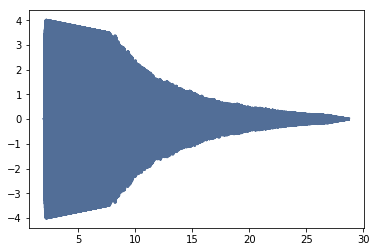

In [8]:
wave.plot()


`segment` creates a new wave. We can use it to zoom in our wave.

No handlers could be found for logger "matplotlib.legend"


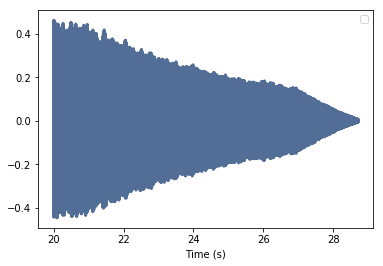

In [9]:
segment = wave.segment(start=20, duration=25)
segment.plot()
thinkplot.config(xlabel='Time (s)')

`normalize` scales a wave so the amplitude doesn't exceed -amp to amp.


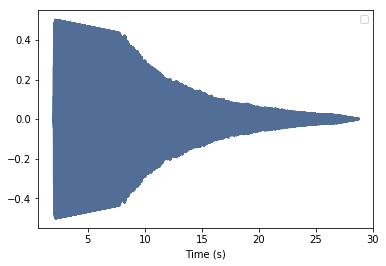

In [10]:
wave.normalize(amp=0.5)
wave.plot()
thinkplot.config(xlabel='Time (s)')

`wave.write` writes the wave to a file so it can be used by an exernal player.

In [11]:
wave.write('temp.wav')

Writing temp.wav


# Spectrum objects

Wave provides `make_spectrum`, which computes the spectrum of the wave.

In [12]:
spectrum = wave.make_spectrum()

`plot` plots the spectrum.

You can set `high` to a value in frequency to limit the frequency on the x axis.

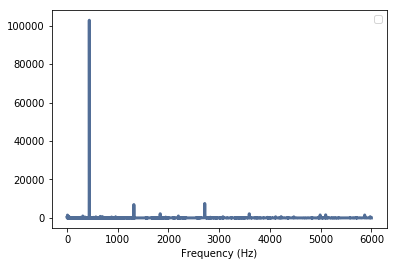

In [14]:
spectrum.plot(high=6000)
thinkplot.config(xlabel='Frequency (Hz)')

### Filters

`low_pass` applies a low pass filter.

In [15]:
spectrum.low_pass(cutoff=3000)

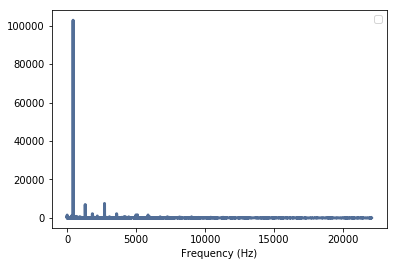

In [13]:
spectrum.plot()
thinkplot.config(xlabel='Frequency (Hz)')

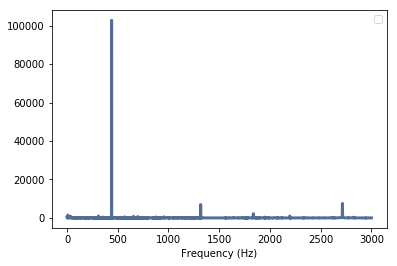

In [16]:
spectrum.plot(high=3000)
thinkplot.config(xlabel='Frequency (Hz)')

In [21]:
spectrum

<thinkdsp.Spectrum instance at 0x113538cf8>

##### Transform the filtered spectrum back into Wave

`make_wave` transforms to the time domain.

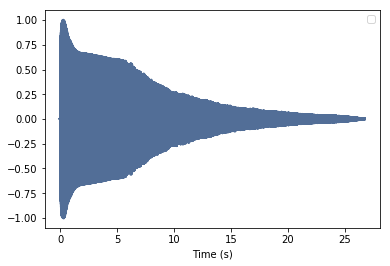

In [17]:
filtered = spectrum.make_wave() # convert the filtered spectrum back to a wave
filtered.normalize() # normalize it to the range -1 to 1.

filtered.plot()
thinkplot.config(xlabel='Time (s)')

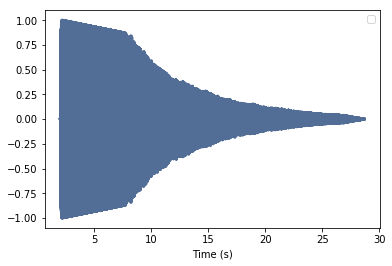

In [18]:
wave.normalize()

wave.plot()
thinkplot.config(xlabel='Time (s)')

`make_audio` makes an IPython Audio object.

In [19]:
wave.make_audio()

In [20]:
filtered.make_audio()

--
# Methods

### Wave object

apodize(self, denom=20, duration=0.1)
> Tapers the amplitude at the beginning and end of the signal.
Tapers either the given duration of time or the given
fraction of the total duration, whichever is less.

> denom: float fraction of the segment to taper

>duration: float duration of the taper in seconds

convolve(self, other)
> Convolves two waves.

> Note: this operation ignores the timestamps; the result
has the timestamps of self.

> other: Wave or NumPy array

> returns: Wave

copy(self)
> Makes a copy.
 
> Returns: new Wave

corr(self, other)
> Correlation coefficient two waves.
 
> other: Wave
 
> returns: float coefficient of correlation

cos_cov(self, k)
> Covariance with a cosine signal.
 
> freq: freq of the cosine signal in Hz
 
> returns: float covariance

cos_transform(self)
> Discrete cosine transform.
 
> returns: list of frequency, cov pairs

cov(self, other)
> Covariance of two unbiased waves.
 
> other: Wave
 
> returns: float

cov_mat(self, other)
> Covariance matrix of two waves.
 
> other: Wave
 
> returns: 2x2 covariance matrix

cumsum(self)
> Computes the cumulative sum of the elements.
 
>returns: new Wave

diff(self)
>Computes the difference between successive elements.
 
>returns: new Wave

find_index(self, t)
>Find the index corresponding to a given time.

>t: time

get_xfactor(self, options)

hamming(self)
> Apply a Hamming window to the wave.

make_audio(self)
>Makes an IPython Audio object.

make_dct(self)
>Computes the DCT of this wave.

make_spectrogram(self, seg_length, win_flag=True)
>Computes the spectrogram of the wave.
 
> seg_length: number of samples in each segment

>win_flag: boolean, whether to apply hamming window to each segment
 
>returns: Spectrogram

make_spectrum(self, full=False)
>Computes the spectrum using FFT.
 
>returns: Spectrum

max_diff(self, other)
>Computes the maximum absolute difference between waves.
 
>other: Wave
 
>returns: float

normalize(self, amp=1.0)
>Normalizes the signal to the given amplitude.
 
>amp: float amplitude

play(self, filename='sound.wav')
>Plays a wave file.
 
>filename: string

plot(self, **options)
>Plots the wave.

plot_vlines(self, **options)
> Plots the wave with vertical lines for samples.

quantize(self, bound, dtype)
>Maps the waveform to quanta.
 
>bound: maximum amplitude

>dtype: numpy data type or string
 
>returns: quantized signal

roll(self, roll)
>Rolls this wave by the given number of locations.

scale(self, factor)
>Multplies the wave by a factor.
 
>factor: scale factor

segment(self, start=None, duration=None)
>Extracts a segment.
 
>start: float start time in seconds

>duration: float duration in seconds
 
>returns: Wave

shift(self, shift)
>Shifts the wave left or right in time.
 
>shift: float time shift

slice(self, i, j)
>Makes a slice from a Wave.
 
>i: first slice index

>j: second slice index

truncate(self, n)
>Trims this wave to the given length.
 
>n: integer index

unbias(self)
>Unbiases the signal.

window(self, window)
>Apply a window to the wave.
 
>window: sequence of multipliers, same length as self.ys

write(self, filename='sound.wav')
>Write a wave file.
 
>filename: string

zero_pad(self, n)
>Trims this wave to the given length.
 
>n: integer index

### Spectrum object